# Time Series Visual Prediction of Malaria Death in Cote d’Ivoire using the HIMS Data

In [1]:
# Importation of all the packages we need for this exercice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
sns.set()

## Explore the dataset

In [2]:
# Importation of the time series data of Malaria death

df = pd.read_csv('D:/USAID/Poster_Presentation/Malaria_Death.csv')

In [3]:
# How the data looking like

df.head(3)

,Quarter,Malaria death
0,2017-Q1,612
1,2017-Q2,983
2,2017-Q3,847


In [4]:
# Data type check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Quarter        28 non-null     object
 1   Malaria death  28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [5]:
# The column 'Quarter' is in object format. We need to convert it in datetime format
df['Quarter'] = df['Quarter'].replace('q','Q')
df.head()

,Quarter,Malaria death
0,2017-Q1,612
1,2017-Q2,983
2,2017-Q3,847
3,2017-Q4,769
4,2018-Q1,615


In [6]:
df['date'] = pd.to_datetime(df['Quarter'])

df.head()

,Quarter,Malaria death,date
0,2017-Q1,612,2017-01-01
1,2017-Q2,983,2017-04-01
2,2017-Q3,847,2017-07-01
3,2017-Q4,769,2017-10-01
4,2018-Q1,615,2018-01-01


In [7]:
df.shape

(28, 3)

In [8]:
from tabulate import tabulate
df.describe()
print(tabulate(df.describe(), headers=['Statistics', 'Value'], tablefmt='github'))

| Statistics   |   Value |
|--------------|---------|
| count        |  28     |
| mean         | 503.75  |
| std          | 211.802 |
| min          | 182     |
| 25%          | 344.5   |
| 50%          | 417.5   |
| 75%          | 641.75  |
| max          | 983     |


In [9]:
df['date'].dtype

dtype('<M8[ns]')

In [10]:
# Set the date column as an index of the dataset
df = df.set_index('date')

In [11]:
df.head()

,Quarter,Malaria death
date,,
2017-01-01,2017-Q1,612
2017-04-01,2017-Q2,983
2017-07-01,2017-Q3,847
2017-10-01,2017-Q4,769
2018-01-01,2018-Q1,615


In [12]:
df.tail()

,Quarter,Malaria death
date,,
2022-10-01,2022-Q4,392
2023-01-01,2023-Q1,387
2023-04-01,2023-Q2,476
2023-07-01,2023-Q3,640
2023-10-01,2023-Q4,647


In [13]:
df_origin = df.copy()

In [14]:
del df['Quarter']

In [15]:
df.head()

,Malaria death
date,
2017-01-01,612
2017-04-01,983
2017-07-01,847
2017-10-01,769
2018-01-01,615


In [16]:
df.rename(columns={'Malaria death': 'Malaria_Death'}, inplace=True)
df.head()

,Malaria_Death
date,
2017-01-01,612
2017-04-01,983
2017-07-01,847
2017-10-01,769
2018-01-01,615


In [17]:
# Check the null values
df.isnull().sum()

Malaria_Death    0
dtype: int64

In [18]:
df.rename(columns={'Malaria death': 'Malaria_death'}, inplace=True)

In [19]:
df.head(2)

,Malaria_Death
date,
2017-01-01,612
2017-04-01,983


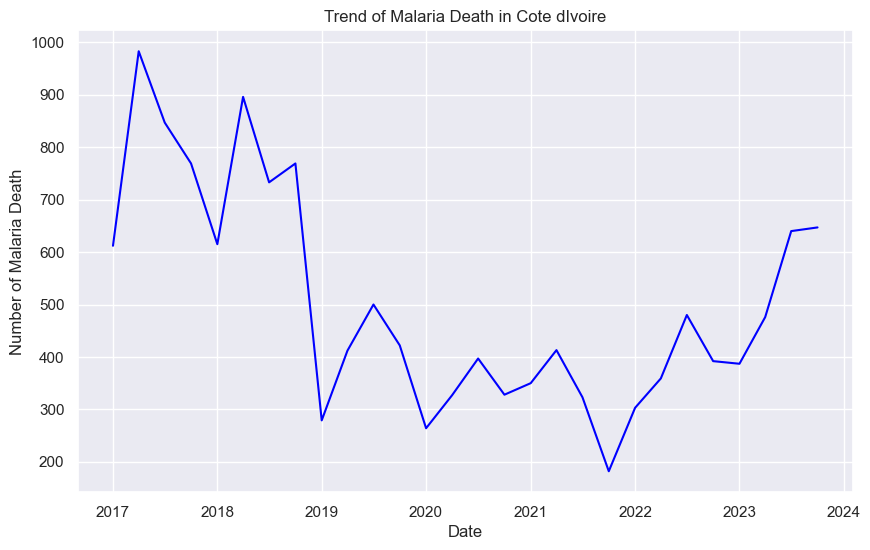

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df, color='blue')
plt.title('Trend of Malaria Death in Cote dIvoire')
plt.xlabel('Date')
plt.ylabel('Number of Malaria Death')
plt.grid(True)
plt.show()

## Check the stationarity

### First test: Perform the rolling statistics

In [21]:
df['rollMean'] = df['Malaria_Death'].rolling(4).mean()
df['rollStd'] = df['Malaria_Death'].rolling(4).std()

In [22]:
df.head(2)

,Malaria_Death,rollMean,rollStd
date,,,
2017-01-01,612,NaN,NaN
2017-04-01,983,NaN,NaN


<AxesSubplot:title={'center':'Rolling Mean and Standard Deviation'}, xlabel='date', ylabel='Malaria_Death'>

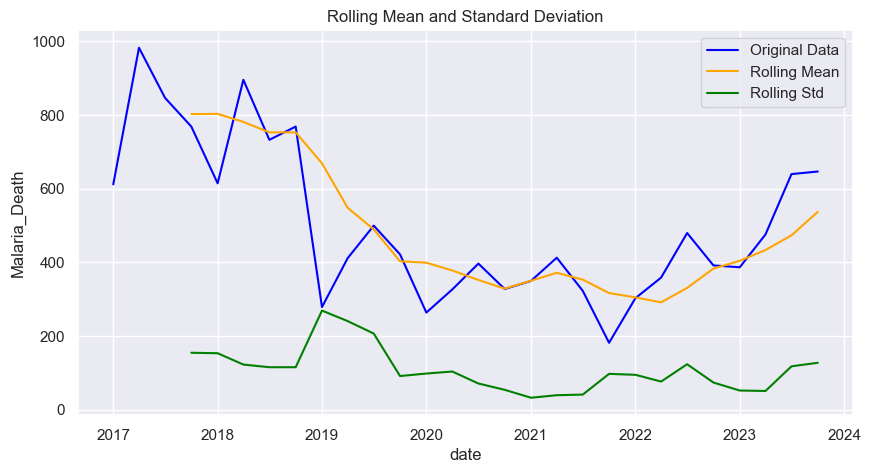

In [23]:
plt.figure(figsize=(10,5))
plt.title('Rolling Mean and Standard Deviation')
sns.lineplot(data=df, x=df.index, y=df['Malaria_Death'], label='Original Data', color='blue')
sns.lineplot(data=df, x=df.index, y=df['rollMean'], label='Rolling Mean',color='orange')
sns.lineplot(data=df, x=df.index, y=df['rollStd'], label='Rolling Std',color='green')

### The data is not stationary

### Make the data Stationary

## Log transformation

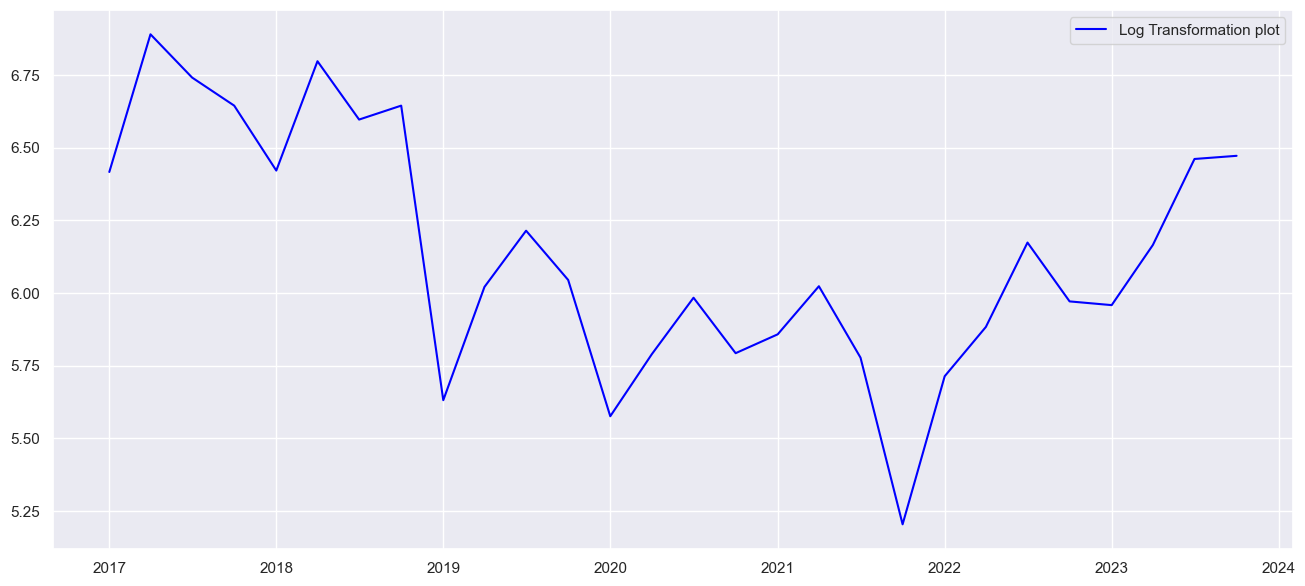

In [24]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
df_log = np.log(df['Malaria_Death'])
plt.plot(df_log, color='blue', label='Log Transformation plot')
plt.legend()

### With the log transformation, the data does not become stationary

## Let's proceed with the decomposition of the time series

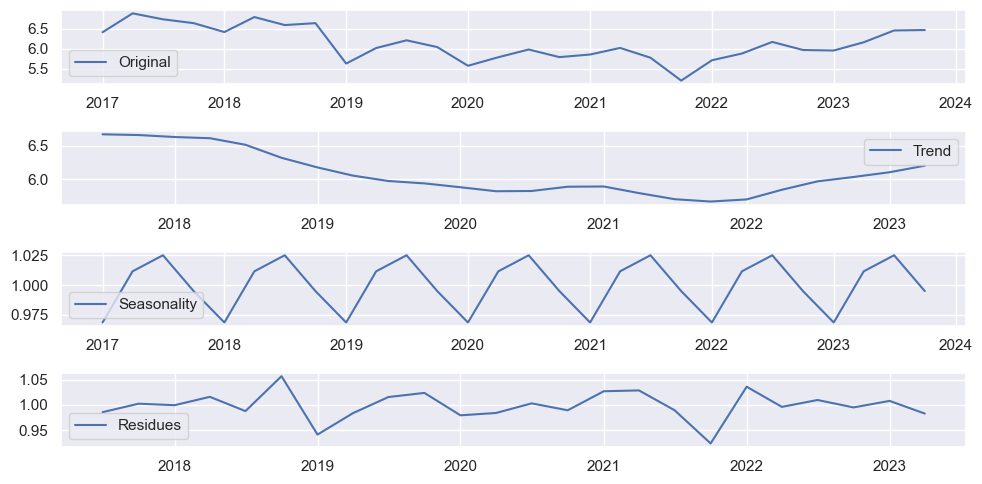

In [25]:
# Perform seasonal breakdown
decomposition = seasonal_decompose(df_log, model='multiplicative')

# Extract the components from the breakdown
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Display the breakdown components
plt.figure(figsize=(10, 5))

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residues')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### The residual component contributes more to the original time series

## Differencing transformation

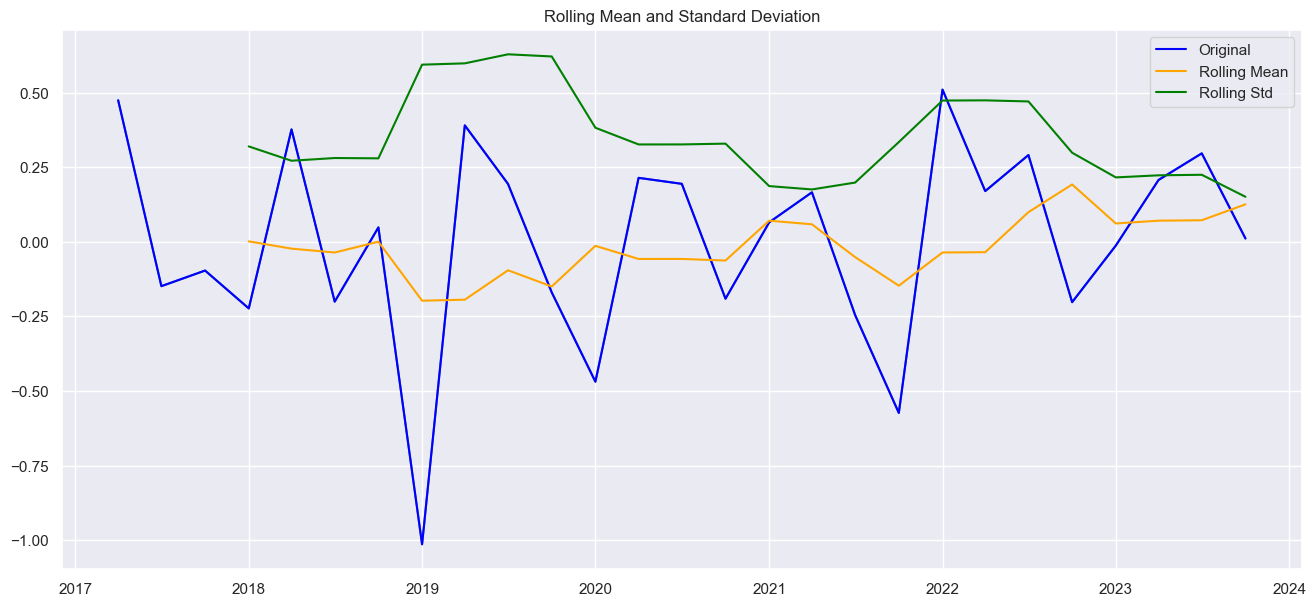

In [26]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

# Determine Rolling Statistics
rollmean = df_log_diff.rolling(4).mean()
rollstd = df_log_diff.rolling(4).std()

# Plot Rolling Statistics
orig = plt.plot(df_log_diff, color='blue', label='Original')
mean = plt.plot(rollmean, color='orange', label='Rolling Mean')
std = plt.plot(rollstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

## Create a function to easily test the stationary of the data

## Time Shift Transformation

In [54]:
# Import the ADF
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

In [27]:
# Time Shift
df['shift'] = df['Malaria_Death'].shift()
df['shiftdiff'] = df['Malaria_Death'] - df['shift']
df.head()

,Malaria_Death,rollMean,rollStd,shift,shiftdiff
date,,,,,
2017-01-01,612,NaN,NaN,NaN,NaN
2017-04-01,983,NaN,NaN,612.0,371.0
2017-07-01,847,NaN,NaN,983.0,-136.0
2017-10-01,769,802.75,154.890015,847.0,-78.0
2018-01-01,615,803.50,153.660882,769.0,-154.0


In [28]:
shift = df['Malaria_Death'].shift().dropna()

In [29]:
shiftdiff = (df['Malaria_Death'] - df['shift']).dropna()

In [55]:
result = adfuller(shiftdiff)

table = [
    ['Test statistic', result[0]],
    ['p-value', result[1]],
    ['Test interpretation', 'The data is stationary' if result[1] < 0.05 else 'The data is not stationary']
]

# Tabulate the results
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique            | Valeur                 |
|---------------------|------------------------|
| Test statistic      | -4.33464248445981      |
| p-value             | 0.0003866965116427854  |
| Test interpretation | The data is stationary |


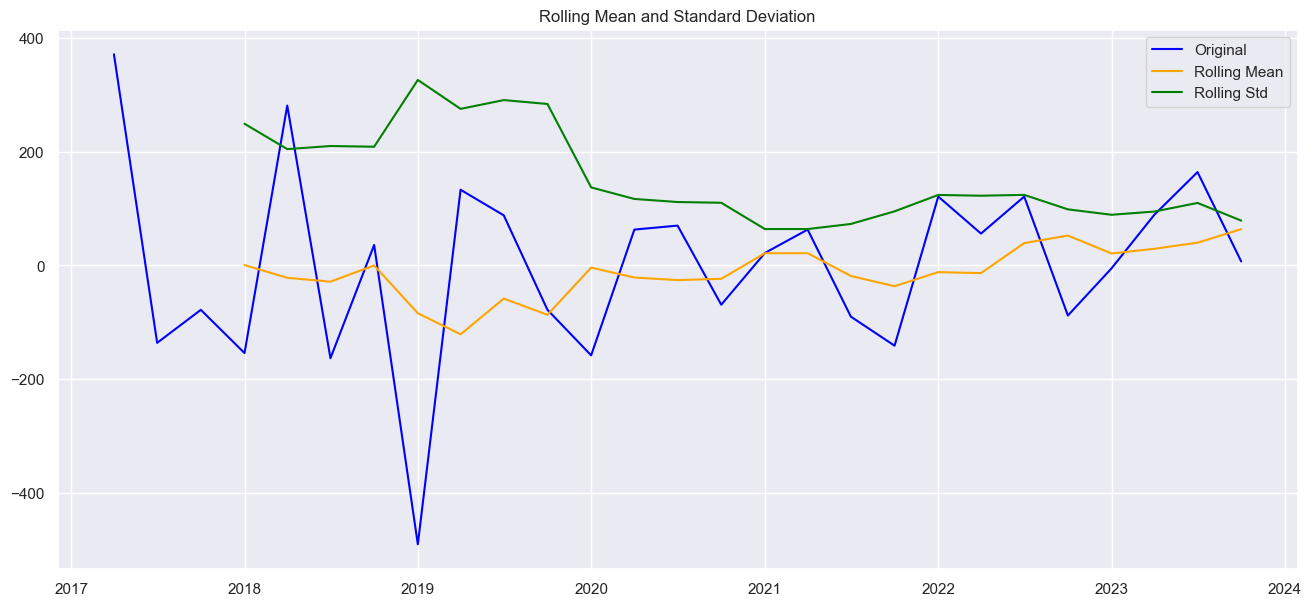

In [57]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

# Determine Rolling Statistics
rollmean = shiftdiff.rolling(4).mean()
rollstd = shiftdiff.rolling(4).std()

# Plot Rolling Statistics
orig = plt.plot(shiftdiff, color='blue', label='Original')
mean = plt.plot(rollmean, color='orange', label='Rolling Mean')
std = plt.plot(rollstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [58]:
df.head(2)

,Malaria_Death,rollMean,rollStd,shift,shiftdiff
date,,,,,
2017-01-01,612,NaN,NaN,NaN,NaN
2017-04-01,983,NaN,NaN,612.0,371.0


### The shiftdiff transformation is stationary. So, we can proceed with the model

## Split the data into training and testing sets:

In [32]:
train = df[:round(len(df['Malaria_Death'])*70/100)]
test = df[round(len(df['Malaria_Death'])*70/100):]

In [33]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(shiftdiff, nlags = 10)
lag_pacf = pacf(shiftdiff, nlags = 10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


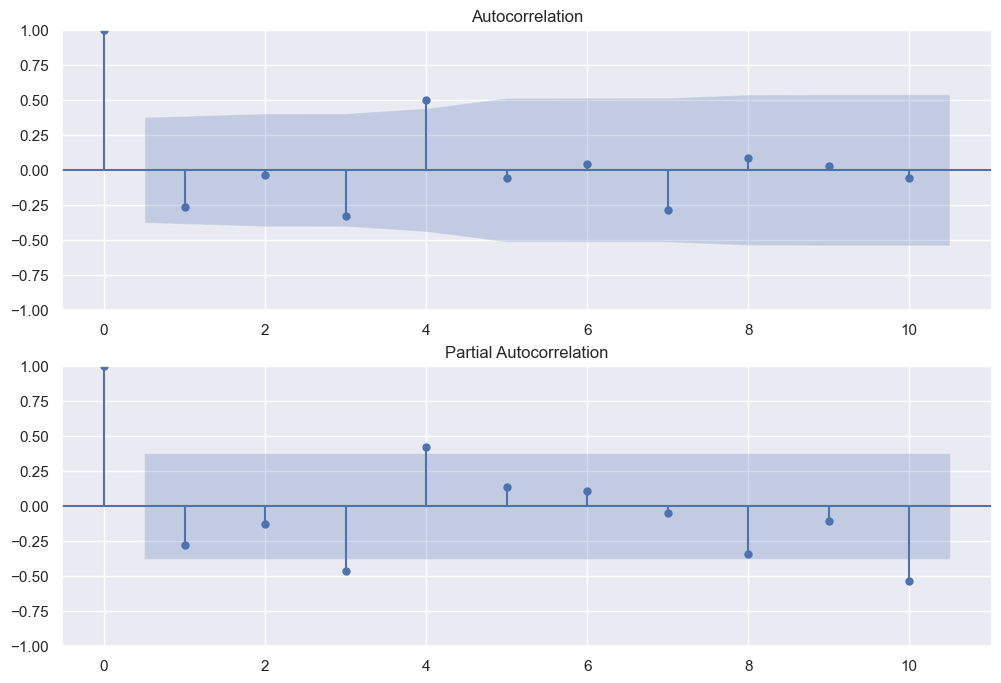

In [34]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(shiftdiff, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(shiftdiff, lags=10, ax=ax2)

In [35]:
# p=3
# d=1
# q=4
# ARIMA(3,1,4)
#order=(4,1,2)
#order=(3,2,4)

## Create a Model with ARIMA parameters

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['shiftdiff'], order=(3,1,4))
results_ARIMA = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [37]:
train = df[:round(len(df['Malaria_Death'])*70/100)]
test = df[round(len(df['Malaria_Death'])*70/100):]

In [38]:
model = ARIMA(train['shiftdiff'], order=(3,1,4))
results_ARIMA = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [39]:
predictions = results_ARIMA.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


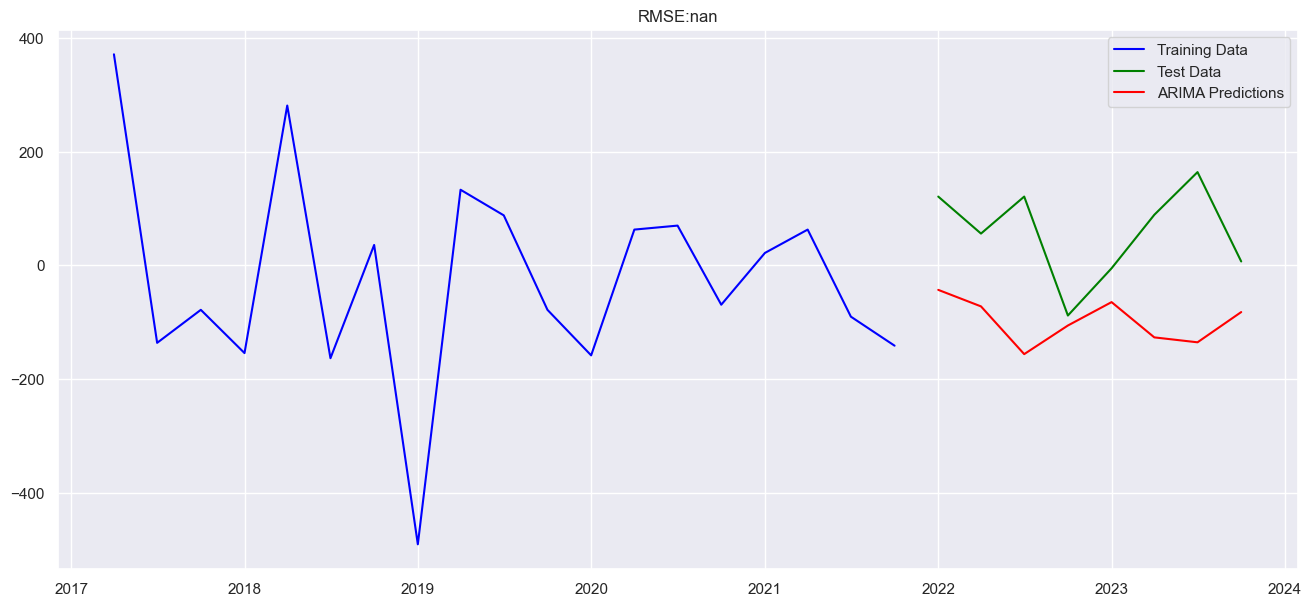

In [40]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
plt.plot(train['shiftdiff'], label='Training Data', color='blue')
plt.plot(test['shiftdiff'], label='Test Data',color='green')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('RMSE:%.4f'% np.sqrt(sum((predictions-df['Malaria_Death'])**2)/len(df['Malaria_Death'])))
plt.show()

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from statsmodels.tsa.arima.model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


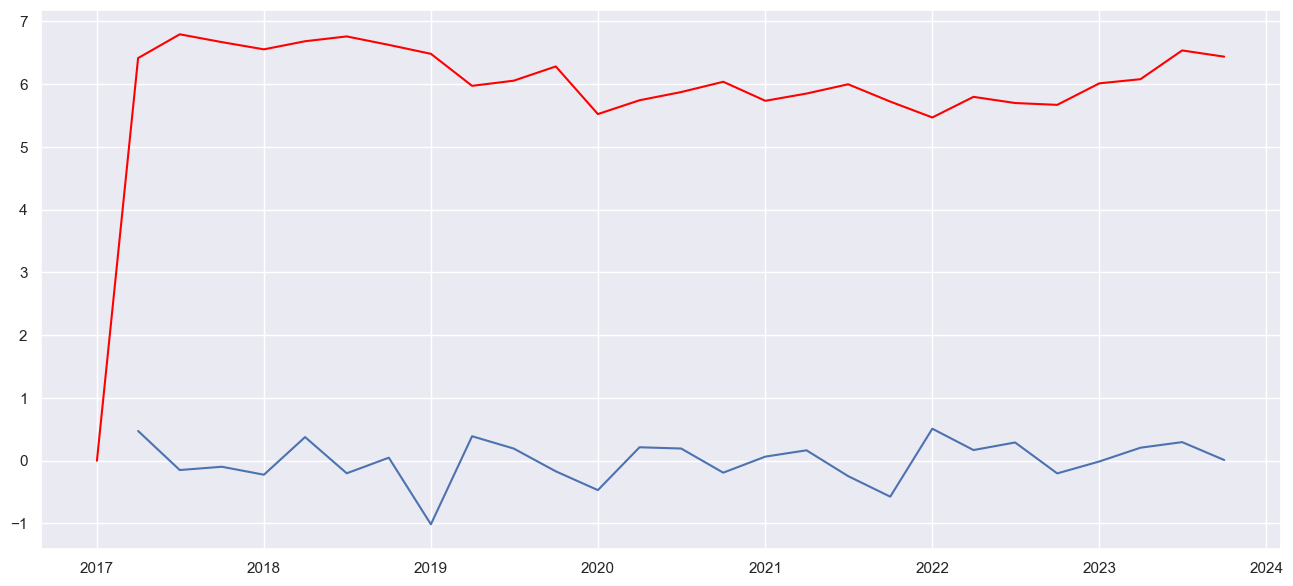

In [43]:
plt.figure(figsize=(16,7))
#model = ARIMA(shiftdiff, order=(3,1,4))
model = ARIMA(df_log, order=(3,1,4))
results_ARIMA = model.fit()
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [44]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

date
2017-01-01    0.000000
2017-04-01    6.416732
2017-07-01    6.795871
2017-10-01    6.671456
2018-01-01    6.556009
dtype: float64


In [45]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

date
2017-01-01     0.000000
2017-04-01     6.416732
2017-07-01    13.212603
2017-10-01    19.884059
2018-01-01    26.440068
dtype: float64


Text(0.5, 1.0, 'RMSE:168.9793')

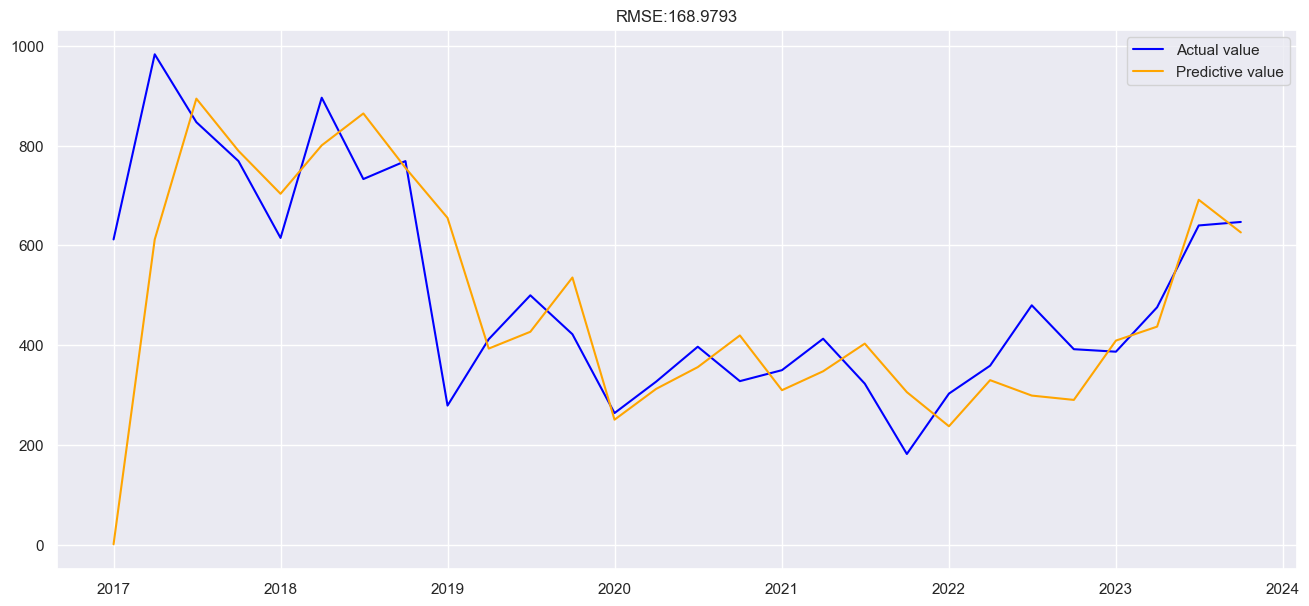

In [46]:
plt.figure(figsize=(16,7))
predictions_ARIMA = np.exp(ARIMA_diff_predictions)
plt.plot(df['Malaria_Death'], color='blue', label='Actual value')
plt.plot(predictions_ARIMA, color='orange', label='Predictive value')
plt.legend()
plt.title('RMSE:%.4f'% np.sqrt(sum((predictions_ARIMA-df['Malaria_Death'])**2)/len(df['Malaria_Death'])))

In [47]:
model = ARIMA(df['Malaria_Death'], order=(3,1,4))
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [48]:
forecast_steps = 4 
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='Q')[1:] 
forecast = results.get_forecast(steps=forecast_steps, index=forecast_index) 

In [49]:
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

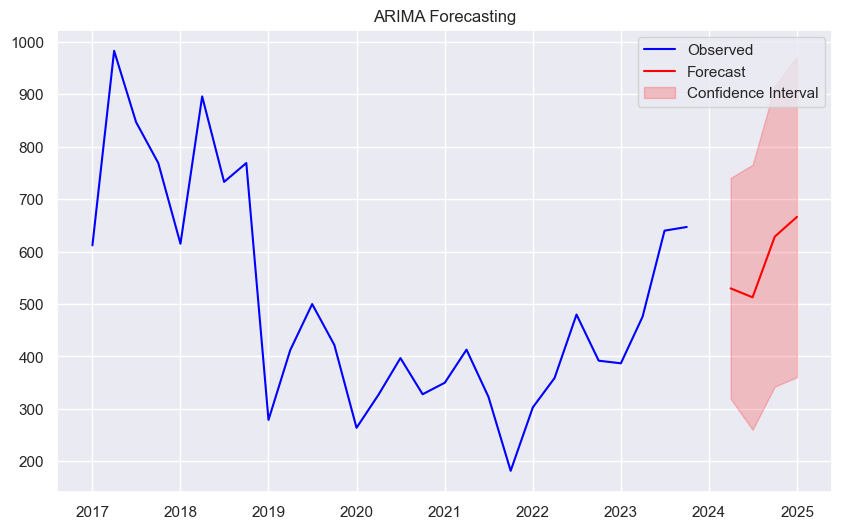

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Malaria_Death'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()
plt.savefig('Forcast.png')